In [30]:
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

In [31]:
df = pd.read_csv("/Users/bhavya/Downloads/creditcard.csv")
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


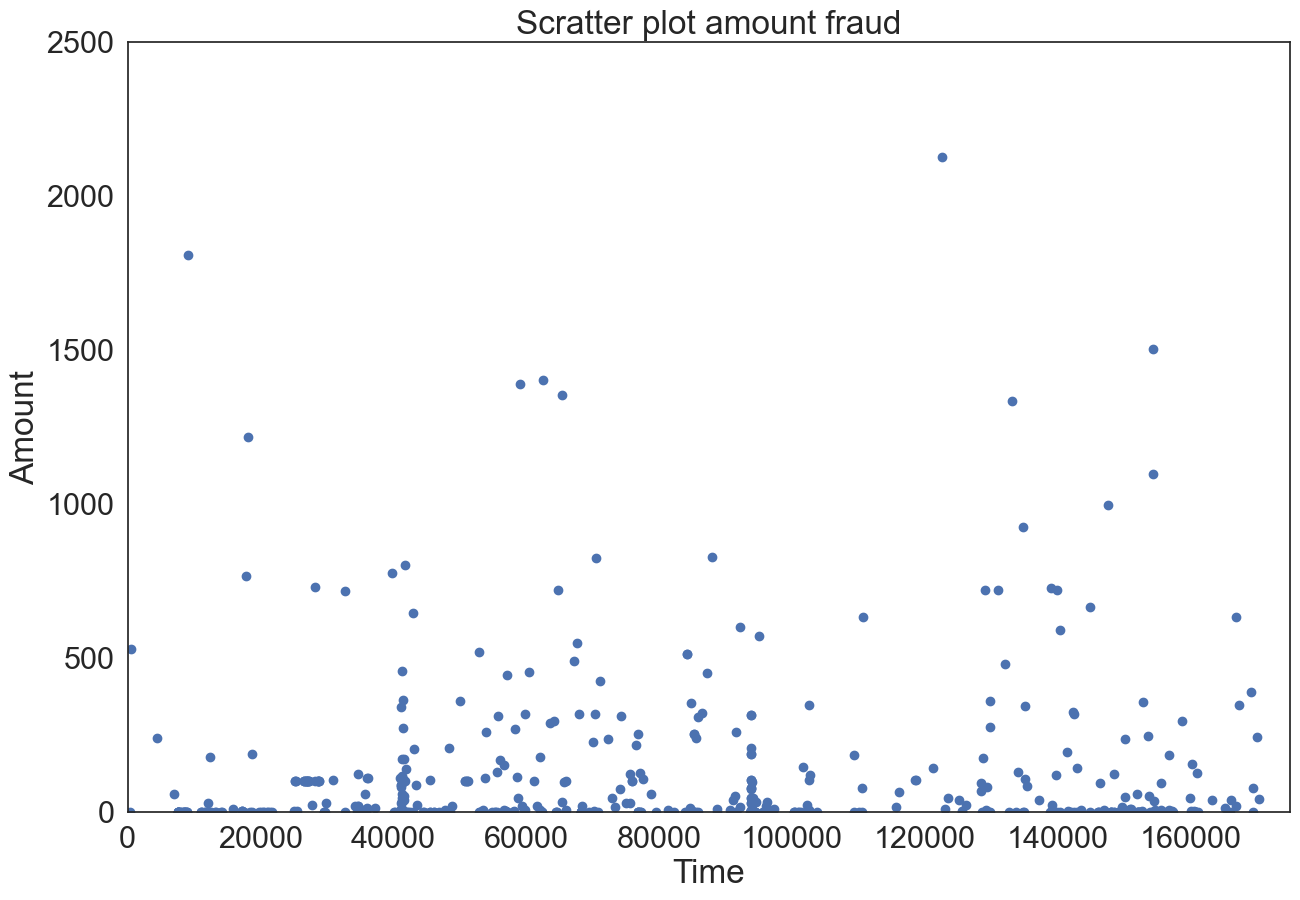

In [32]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [33]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')


There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [34]:

number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [35]:
284315/492

577.8760162601626

In [36]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

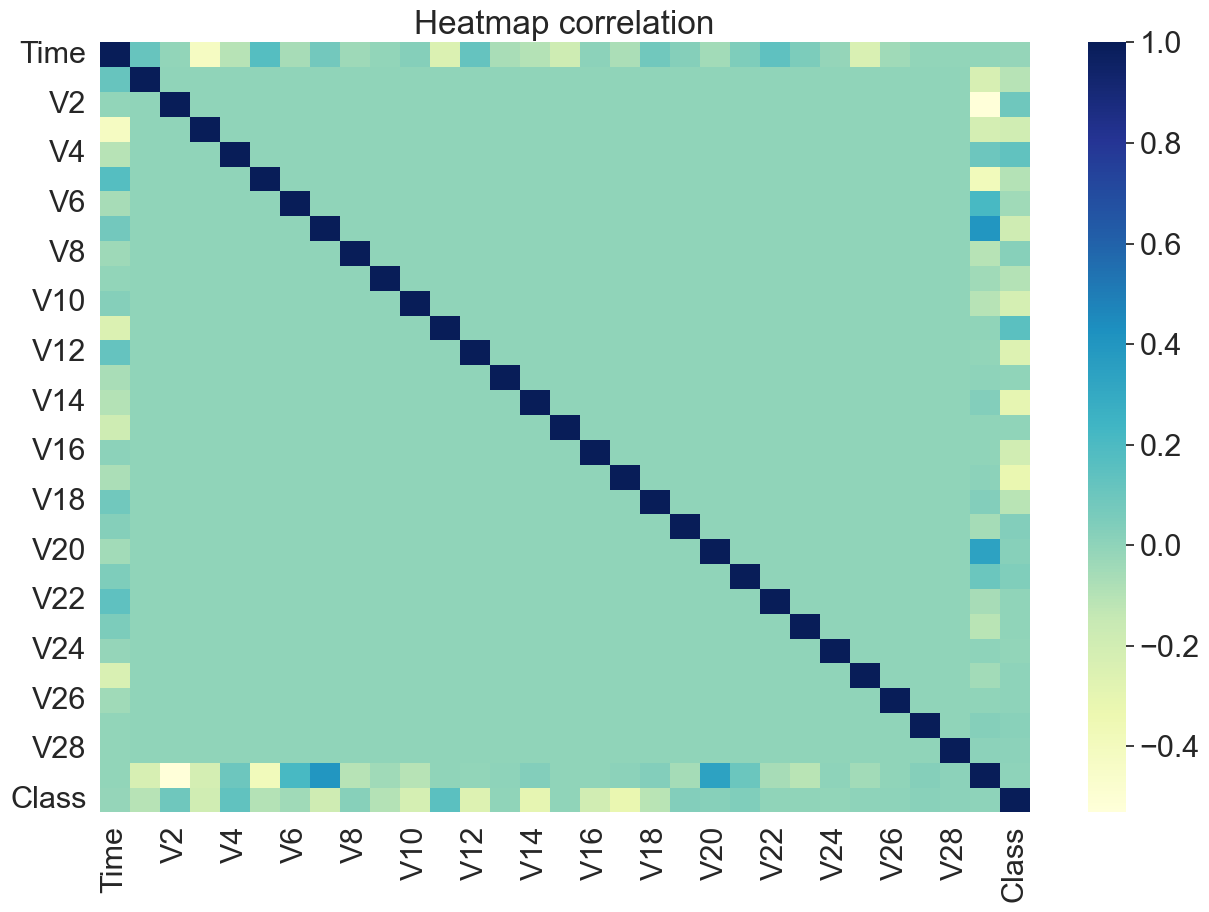

In [37]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [38]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

In [39]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


/var/folders/0n/wx0znj995lz8s02y031t746h0000gn/T/ipykernel_8535/2833462904.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds.


In [40]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [41]:
############################## with all the test dataset to see if the model learn correctly ##################
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [42]:
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)

In [43]:
############################## with all the test dataset to see if the model learn correctly ##################
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

In [44]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [45]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [47]:
classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(kernel='linear')

In [48]:
prediction_SVM_all = classifier.predict(X_test_all) #And finally, we predict our data test.

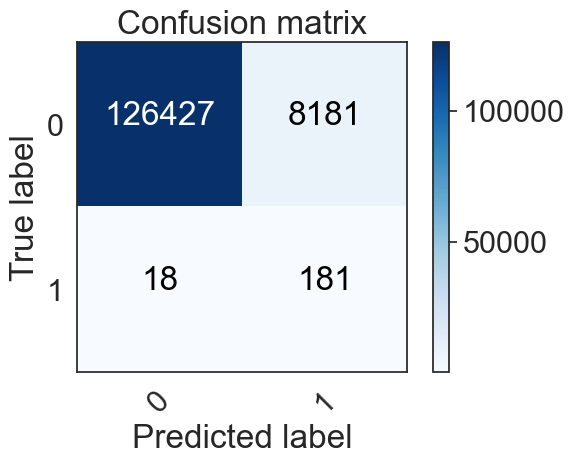

In [49]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [50]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.915474134192143


In [51]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 181 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9095477386934674
the accuracy is : 0.9391797161868449


In [52]:
classifier.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank) #And finally, we predict our data test.


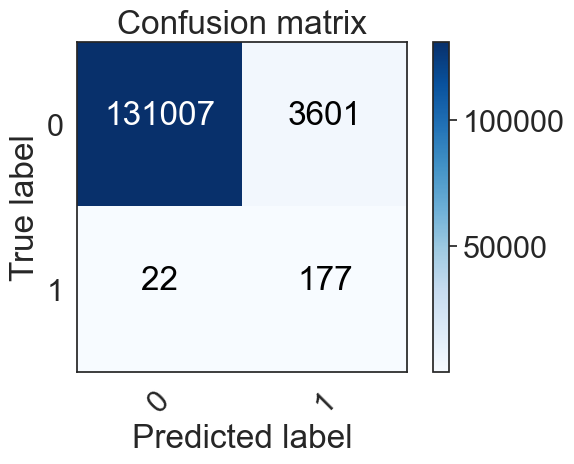

In [53]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [168]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.5, 1:0.5})

In [169]:
classifier_b.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.

SVC(class_weight={0: 0.5, 1: 0.5}, kernel='linear')

In [170]:
prediction_SVM_b_all = classifier_b.predict(X_test_all_rank) #We predict all the data set.


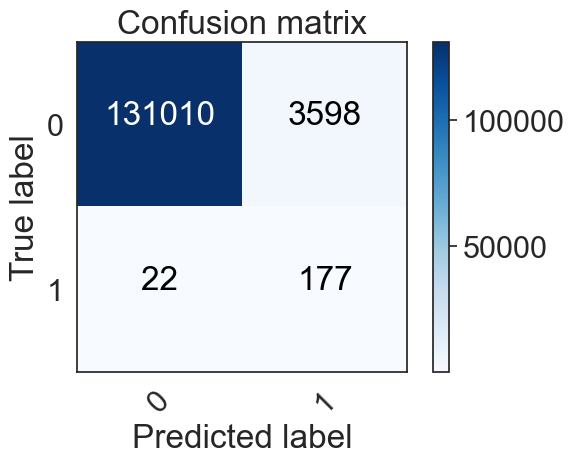

In [171]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [97]:
print('w = ',classifier_b.coef_)
print('b = ',classifier_b.intercept_)
#print('Indices of support vectors = ', classifier_b.support_)
print('Support vectors = ', classifier_b.support_vectors_)
print('Number of support vectors for each class = ', classifier_b.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(classifier_b.dual_coef_))

w =  [[ 0.16644027 -0.51504041 -0.28718475 -0.15309193  0.01212573  0.05823226
  -0.0362796   0.1046016   0.2547553   0.12054126]]
b =  [-1.37587311]
Support vectors =  [[-0.02623167  0.16654223 -1.40018392 ... -1.26673202  4.49400296
   0.83547159]
 [ 0.88723755 -1.53989522 -0.32922991 ... -1.01669037  0.84633034
   0.41339281]
 [ 0.15394464  0.67171073 -0.4179496  ... -0.74037801  3.05024681
   0.19165631]
 ...
 [ 1.67998552 -0.4292119  -0.284368   ...  1.03303201  2.78675033
   1.31533887]
 [ 0.32700641 -0.12675636 -0.78737274 ... -1.06453419  1.92135608
   0.04381609]
 [ 1.14313008 -1.04370523  0.65456672 ...  2.28193938  0.75642429
   0.25601389]]
Number of support vectors for each class =  [64 42]
Coefficients of the support vector in the decision function =  [[0.4        0.4        0.4        0.36084923 0.4        0.4
  0.4        0.4        0.4        0.4        0.4        0.4
  0.04700125 0.4        0.38009804 0.4        0.4        0.05697151
  0.06778317 0.4        0.4       

In [106]:
#classifier_c = classifier_b
classifier_b.intercept_[0] = classifier_b.intercept_[0] + 10
classifier_b.intercept_[0]

18.624126886648078

In [107]:
prediction_SVM_b_all = classifier_b.predict(X_test_all_rank) #We predict all the data set.

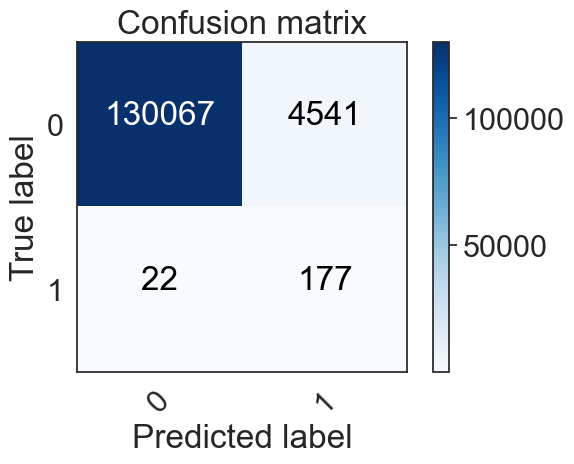

In [108]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [122]:
prediction_SVM_b_all = classifier_b.predict(X_test_all_rank[0:1])
prediction_SVM_b_all

array([0])

In [136]:
print('b = ',classifier_b.intercept_)

b =  [-1.37587311]


In [139]:
prediction_SVM_b_all = classifier_b.predict(X_test_all_rank)
prediction_SVM_b_all

array([0, 0, 1, ..., 0, 0, 0])

In [130]:
classifier_b.coef_

array([[ 0.16644027, -0.51504041, -0.28718475, -0.15309193,  0.01212573,
         0.05823226, -0.0362796 ,  0.1046016 ,  0.2547553 ,  0.12054126]])

In [153]:
buffer = 0.7
pred_c = np.empty(len(X_test_all_rank))
for i in range(len(X_test_all_rank)):
    pred = np.dot(classifier_b.coef_,X_test_all_rank[i]) + classifier_b.intercept_ + buffer
    if(pred >=0): 
        pred = 1
    else:
        pred = 0
    pred_c[i] = pred
    

In [154]:
#pred_c == prediction_SVM_b_all

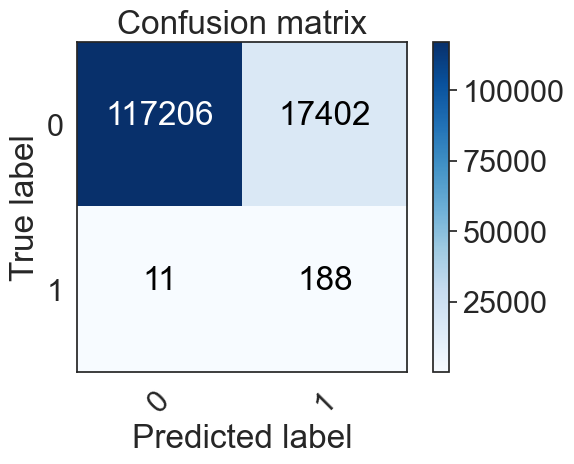

In [155]:
cm = confusion_matrix(y_test_all, pred_c)
plot_confusion_matrix(cm,class_names)

In [109]:
u, s, vh = np.linalg.svd(X_train, full_matrices=True)

In [110]:
s

array([9.04967514e+03, 4.26038117e+02, 1.44668246e+02, 1.29230181e+02,
       8.33268040e+01, 5.07218282e+01, 4.03904205e+01, 3.57842786e+01,
       3.39730292e+01, 3.10094237e+01, 2.95811839e+01, 2.74237396e+01,
       2.59922349e+01, 2.56285854e+01, 2.46013122e+01, 2.30570173e+01,
       2.14374091e+01, 2.10038003e+01, 1.94802583e+01, 1.83991747e+01,
       1.74984958e+01, 1.62891912e+01, 1.40874169e+01, 1.29333560e+01,
       1.21140868e+01, 1.14213399e+01, 1.09067609e+01, 9.95973534e+00,
       8.65323307e+00])

In [172]:
sum(s)

10375.285802803057

In [176]:
p = array([9.04967514e+03, 4.26038117e+02, 1.44668246e+02, 1.29230181e+02,
       8.33268040e+01, 5.07218282e+01, 4.03904205e+01, 3.57842786e+01,
       3.39730292e+01, 3.10094237e+01])
sum(p)

NameError: name 'array' is not defined

In [181]:
sum(s[:10])/sum(s)

0.9662208503731691